In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df= pd.read_csv('sl1.csv')

In [3]:
df

,Area,Price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [4]:
df.shape

(5, 2)

In [5]:
df.size

10

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Area    5 non-null      int64
 1   Price   5 non-null      int64
dtypes: int64(2)
memory usage: 212.0 bytes


In [7]:
df.describe()

,Area,Price
count,5.000000,5.000000
mean,3280.000000,626000.000000
std,540.370243,74949.983322
min,2600.000000,550000.000000
25%,3000.000000,565000.000000
50%,3200.000000,610000.000000
75%,3600.000000,680000.000000
max,4000.000000,725000.000000


In [8]:
df.columns

Index(['Area', 'Price'], dtype='object')

In [9]:
## step1-- split the target and feature
target=df[['Price']]
feature= df.drop('Price',axis=1)
feature

,Area
0,2600
1,3000
2,3200
3,3600
4,4000


In [10]:
target

,Price
0,550000
1,565000
2,610000
3,680000
4,725000


In [11]:
## step2-- split the data into train and test
x_train,x_test,y_train,y_test= train_test_split(feature,target,train_size=0.7,random_state=10)

In [12]:
x_train

,Area
0,2600
4,4000
1,3000


In [13]:
x_test

,Area
2,3200
3,3600


In [14]:
y_train

,Price
0,550000
4,725000
1,565000


In [15]:
y_test

,Price
2,610000
3,680000


In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3, 1)
(2, 1)
(3, 1)
(2, 1)


In [17]:
## step3 model selection and assign

In [18]:
lin_model= LinearRegression()

In [19]:
## step4-- Model Training
lin_model.fit(x_train,y_train)

LinearRegression()

In [20]:
##  training validation

In [21]:
y_pred_train=lin_model.predict(x_train)
y_pred_train

array([[534294.87179487],
       [718717.94871795],
       [586987.17948718]])

In [22]:
err_train=y_train-y_pred_train
err_train

,Price
0,15705.128205
4,6282.051282
1,-21987.179487


In [23]:
lin_model.score(x_train,y_train)

0.9591026776589222

In [24]:
y_train

,Price
0,550000
4,725000
1,565000


In [25]:
y_pred_train

array([[534294.87179487],
       [718717.94871795],
       [586987.17948718]])

In [26]:
550000-534294

15706

In [27]:
## Validation of data
y_pred_test= lin_model.predict(x_test)

In [28]:
y_pred_test

array([[613333.33333333],
       [666025.64102564]])

In [29]:
y_test

,Price
2,610000
3,680000


In [30]:
lin_model.score(x_test,y_test)

0.9157576245488329

In [31]:
## B0-- intercept
lin_model.intercept_

array([191794.87179487])

In [32]:
## B1--coef
lin_model.coef_

array([[131.73076923]])

In [33]:
y_pred_test

array([[613333.33333333],
       [666025.64102564]])

In [34]:
x_test

,Area
2,3200
3,3600


In [35]:
## y_pred= B0+x*B1
191794.87179487 +3600*131.73076923

666025.64102287

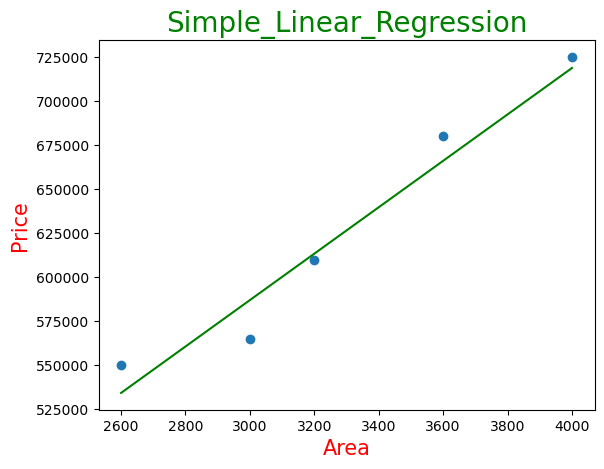

In [36]:
## Plotting the Simple Linear Regression
plt.scatter(df.Area,df.Price)
plt.xlabel('Area',color='red',size=15)
plt.ylabel('Price',color='red',size=15)
plt.title('Simple_Linear_Regression',color='green',size=20)
plt.plot(df.Area,lin_model.predict(df[['Area']]),color='green')

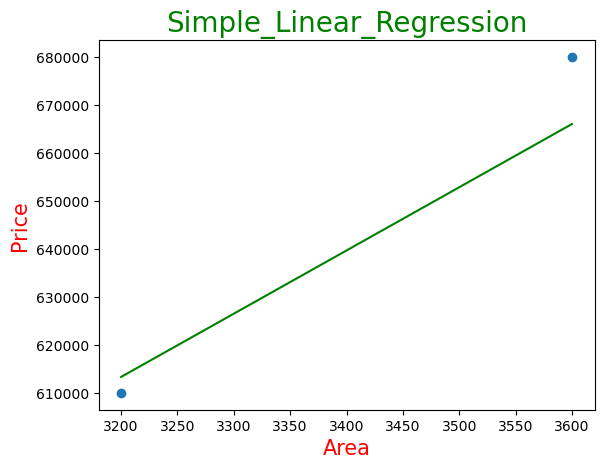

In [38]:
## Plotting the Simple Linear Regression
plt.scatter(x_test,y_test)
plt.xlabel('Area',color='red',size=15)
plt.ylabel('Price',color='red',size=15)
plt.title('Simple_Linear_Regression',color='green',size=20)
plt.plot(x_test,lin_model.predict(x_test),color='green')

## Multiple linear Regression

In [39]:
df1= pd.read_csv('housing_data.csv')

In [40]:
df1.head()

,Price,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
0,16858,1629,1.0,3,0.76,180,0
1,26049,1344,2.0,3,0.92,13,0
2,26130,822,1.0,2,0.56,173,0
3,31113,1540,1.0,2,0.04,115,0
4,40932,1320,1.0,3,0.17,90,0


In [41]:
df1.shape

(1047, 7)

In [53]:
target=df1[['Price']]
features= df1.drop('Price',axis=1)

In [43]:
df1.isnull().sum()

Price         0
LivingArea    0
Bathrooms     0
Bedrooms      0
LotSize       0
Age           0
Fireplace     0
dtype: int64

In [59]:
df1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1042    False
1043    False
1044    False
1045    False
1046    False
Length: 1035, dtype: bool

In [52]:
df1.drop_duplicates(inplace=True)

In [54]:
target

,Price
0,16858
1,26049
2,26130
3,31113
4,40932
...,...
1042,387652
1043,391842
1044,394532
1045,432845


In [55]:
features

,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
0,1629,1.0,3,0.76,180,0
1,1344,2.0,3,0.92,13,0
2,822,1.0,2,0.56,173,0
3,1540,1.0,2,0.04,115,0
4,1320,1.0,3,0.17,90,0
...,...,...,...,...,...,...
1042,3504,2.5,5,0.90,0,1
1043,3003,3.5,4,0.46,88,1
1044,3361,3.5,4,0.71,1,1
1045,3250,2.5,3,0.53,23,1


In [56]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.75,random_state=100)

In [58]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(776, 6)
(776, 1)
(259, 6)
(259, 1)


In [64]:
df1['Fireplace'].value_counts()

Fireplace
1    614
0    421
Name: count, dtype: int64

In [65]:
linear_model= LinearRegression()

In [66]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [67]:
y_pred= linear_model.predict(x_test)

In [68]:
y_pred

array([[231757.37578316],
       [138750.35268672],
       [160226.96754175],
       [162334.0425731 ],
       [223052.6036828 ],
       [306189.60301133],
       [221877.56118642],
       [161103.73205697],
       [195214.51519177],
       [259949.67687575],
       [114599.8312071 ],
       [119971.79988422],
       [ 97608.93684329],
       [194650.49253441],
       [172517.939349  ],
       [133351.35250692],
       [114241.97423605],
       [ 87532.27815873],
       [247349.08184107],
       [219769.73413637],
       [136488.647041  ],
       [197108.52947494],
       [144194.44418094],
       [205256.84962863],
       [207888.7219619 ],
       [250321.31506003],
       [120527.26980011],
       [135449.60467911],
       [325092.66980563],
       [209495.89221481],
       [252072.361452  ],
       [172580.36237419],
       [263024.80386812],
       [293369.03394178],
       [184752.34996372],
       [ 96453.39617843],
       [124043.99987981],
       [103564.27785181],
       [ 837

In [69]:
linear_model.score(x_test,y_test)

0.6704394473339744

In [70]:
linear_model.intercept_

array([31474.57302628])

In [71]:
linear_model.coef_

array([[   66.85371348, 16121.18384596, -6128.52054564,  -119.41593756,
         -187.60949933, 11175.68274553]])

In [72]:
err= y_test-y_pred

array([[<Axes: title={'center': 'Price'}>]], dtype=object)

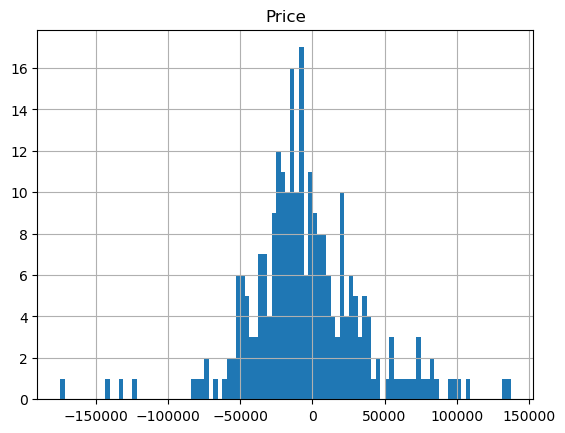

In [76]:
err.hist(bins=100)

In [86]:
sse=((y_test-y_pred)**2).sum()
sse

Price    4.290905e+11
dtype: float64

In [87]:
sst= ((y_test-y_test.mean())**2).sum()
sst

Price    1.302008e+12
dtype: float64

In [90]:
R_squared=1-(sse/sst)
R_squared

Price    0.670439
dtype: float64

In [91]:
from sklearn.metrics import r2_score

In [100]:
rsquared=r2_score(y_test,y_pred)

In [93]:
import seaborn as sns

<Axes: xlabel='Price'>

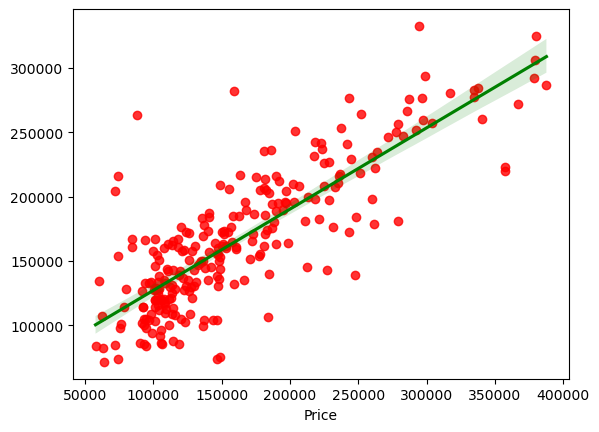

In [97]:
sns.regplot(data=df1,x=y_test,y=y_pred,scatter_kws={'color':'red'},line_kws={'color':'green'})

In [98]:
df1.shape

(1035, 7)

In [99]:
features

,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
0,1629,1.0,3,0.76,180,0
1,1344,2.0,3,0.92,13,0
2,822,1.0,2,0.56,173,0
3,1540,1.0,2,0.04,115,0
4,1320,1.0,3,0.17,90,0
...,...,...,...,...,...,...
1042,3504,2.5,5,0.90,0,1
1043,3003,3.5,4,0.46,88,1
1044,3361,3.5,4,0.71,1,1
1045,3250,2.5,3,0.53,23,1


In [101]:
adj_r2= 1-((1-rsquared)*(1035-1)/(1035-6-1))

In [102]:
adj_r2

0.668515942162772

In [103]:
## Linear regression using statsmodels

In [104]:
import statsmodels.formula.api as sfa

In [113]:
df2= pd.read_csv('Advertising.csv',index_col=0)

In [114]:
df2.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [115]:
## Simple Linear Regression

In [116]:
model=sfa.ols(formula='sales~TV',data=df2).fit()

In [117]:
model.rsquared

0.611875050850071

In [118]:
model.rsquared_adj

0.6099148238341623

In [121]:
df2.shape

(200, 4)

In [119]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [120]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           1.47e-42
Time:                        11:37:11   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
## Multiple Linear regression

In [123]:
model1=sfa.ols(formula='sales~TV+newspaper+radio',data=df2).fit()

In [124]:
model1.rsquared

0.8972106381789522

In [125]:
model1.rsquared_adj

0.8956373316204668

In [126]:
model1.params

Intercept    2.938889
TV           0.045765
newspaper   -0.001037
radio        0.188530
dtype: float64

In [127]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           1.58e-96
Time:                        11:49:51   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
radio          0.1885      0.009     21.893      0.000       0.172       0.206
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""